<a href="https://colab.research.google.com/github/gabrieldimas/panaromic-photo-caries-detection-using-cnn/blob/main/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


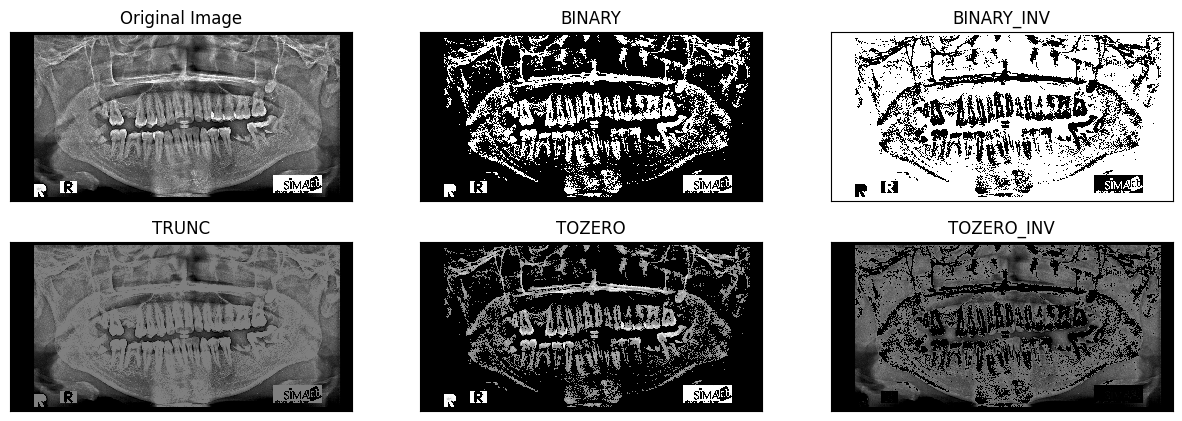

In [25]:
image = ('/content/drive/MyDrive/data/dataset/raw/panaromic/IMG_0417.JPG')
# Convert to grayscale for easier processing
img = cv.imread(image)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain
# itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

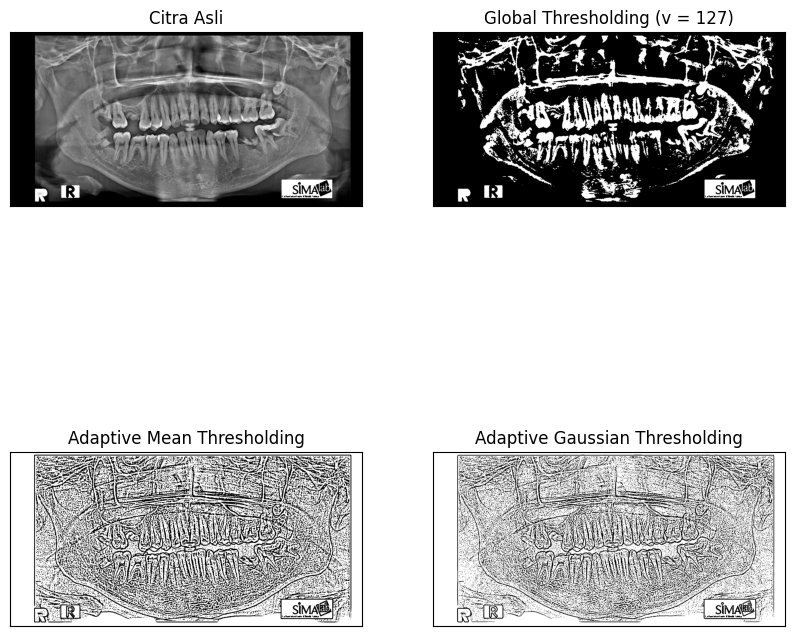

In [34]:
citra = cv.medianBlur(cv.imread(image),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

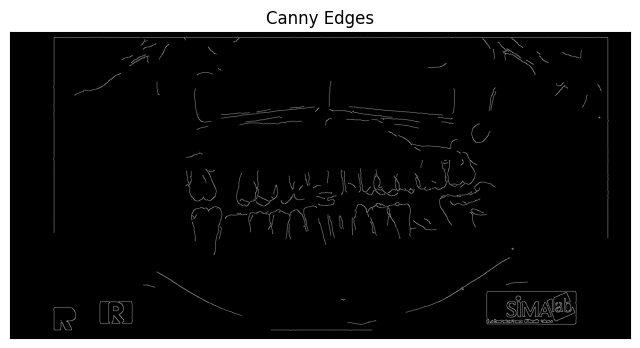

In [35]:
blurred = cv.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv.Canny(blurred, 100, 200) # Example thresholds

# Display the results
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.xticks([]), plt.yticks([])
plt.show()